In [25]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
import pandas as pd

# Load data and set usage_end_time as index with correct datetime parsing
df = pd.read_csv('~/Desktop/myProjects/Machine-Learning-and-Python-Projects/Hackathon/gcp_billing_data_20240816 - gcp_billing_data_20240816(in).csv', 
                 index_col="usage_end_time", 
                 parse_dates=["usage_end_time"])

# Get the unique service types
unique_service_types = df['service_type'].unique()
print(f"Unique Service Types: \n{unique_service_types}\n ")

# Filter and analyze a specific service type (e.g., 'Cloud DNS')
df_service_type = df[df['service_type'] == 'Cloud DNS']
#

from adtk.data import validate_series
print(df_service_type.head())



Unique Service Types: 
['Compute Engine' 'Networking' 'Cloud Logging' 'Kubernetes Engine'
 'Cloud Storage' 'BigQuery' 'Vertex AI' 'Cloud Monitoring' 'Cloud SQL'
 'Cloud DNS' 'Cloud Pub/Sub' 'Artifact Registry' 'Cloud Functions'
 'Cloud Build' 'BigQuery Reservation API' 'Deep Learning VM'
 'Cloud Dataflow' 'Dataplex']
 
                         cost service_type       region  usage_amount  \
usage_end_time                                                          
2024-02-20 08:00:00  0.000287    Cloud DNS  us-central1        3600.0   
2024-02-21 14:00:00  0.000287    Cloud DNS  us-central1        3600.0   
2024-03-08 17:00:00  0.000538    Cloud DNS  us-central1        7200.0   
2024-03-15 14:00:00  0.000269    Cloud DNS  us-central1        3600.0   
2024-03-15 15:00:00  0.000269    Cloud DNS  us-central1        3600.0   

                    usage_unit  
usage_end_time                  
2024-02-20 08:00:00    seconds  
2024-02-21 14:00:00    seconds  
2024-03-08 17:00:00    seconds  
20

In [24]:
# '''
# 30min interval
# '''

# # df_30min = df.resample('30T').agg({
# #     'cost': 'sum',
# #     'usage_amount': 'sum',
# #     'service_type': 'first',
# #     'region': 'first',
# #     'usage_unit': 'first'
# # }).reset_index()


# # # Line chart
# # plt.figure(figsize=(12, 6))
# # plt.plot(df_30min['usage_end_time'], df_30min['cost'], label='Cost')
# # # plt.plot(df_ComputeEngine_hourly['usage_end_time'], df_ComputeEngine_hourly['usage_amount'], label='Usage Amount')
# # plt.xlabel('Time')
# # plt.ylabel('cost')
# # plt.title('30 min Data for Specific Service Type')
# # plt.legend()
# # plt.show()

# # # bar chart
# # plt.figure(figsize=(12, 6))
# # plt.bar(df_30min['usage_end_time'], df_30min['cost'], width=2)
# # plt.xlabel('Time')
# # plt.ylabel('Cost')
# # plt.title('30 min Cost for Specific Service Type')
# # plt.show()

# # #ADTK PLOT

# # Resample data on an hourly basis



       usage_end_time      cost  usage_amount       region usage_unit
0 2024-02-20 08:00:00  0.000287        3600.0  us-central1    seconds
1 2024-02-20 09:00:00  0.000000           0.0         None       None
2 2024-02-20 10:00:00  0.000000           0.0         None       None
3 2024-02-20 11:00:00  0.000000           0.0         None       None
4 2024-02-20 12:00:00  0.000000           0.0         None       None


Text(0.5, 1.0, 'Hourly Cost for Specific Service Type')

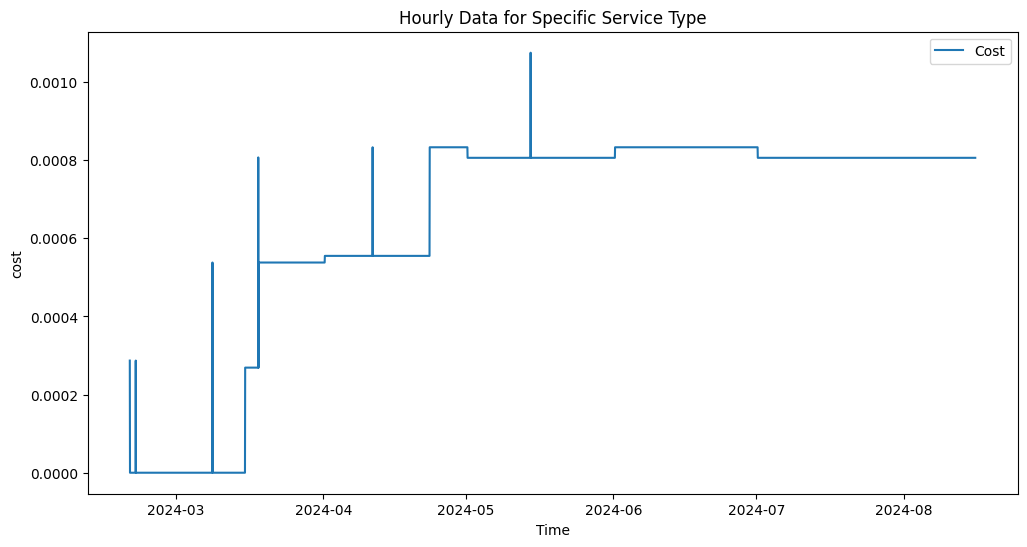

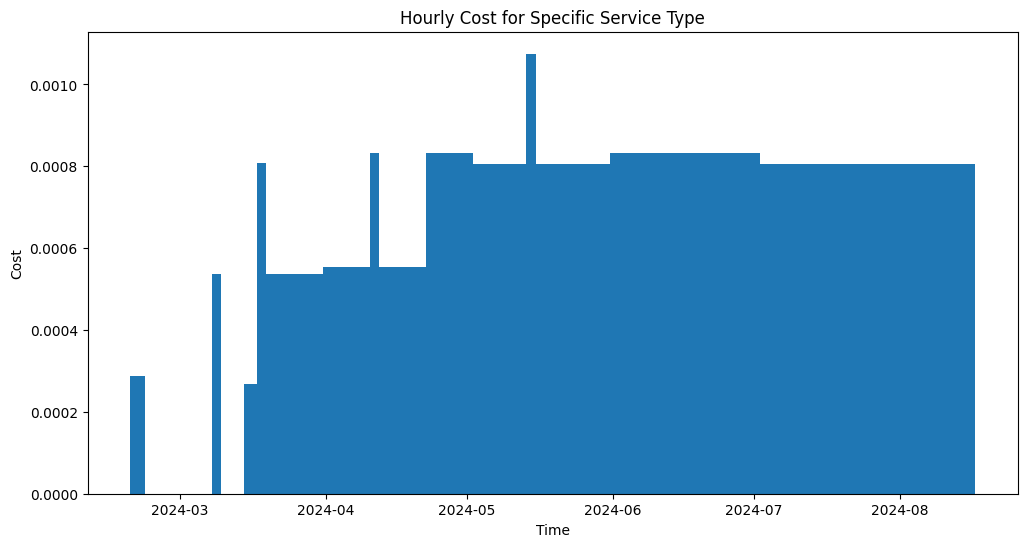

In [34]:
#Investigating over different time intervals/granularities
'''
Hourly
'''

df_ComputeEngine_hourly = df_compute_engine.resample('H').agg({
    'cost': 'sum',
    'usage_amount': 'sum',
    'region': 'first',  # or use 'mode'/'max' depending on your requirement
    'usage_unit': 'first'
}).reset_index()

print(df_ComputeEngine_hourly.head())


# Line chart
plt.figure(figsize=(12, 6))
plt.plot(df_ComputeEngine_hourly['usage_end_time'], df_ComputeEngine_hourly['cost'], label='Cost')
# plt.plot(df_ComputeEngine_hourly['usage_end_time'], df_ComputeEngine_hourly['usage_amount'], label='Usage Amount')
plt.xlabel('Time')
plt.ylabel('cost')
plt.title('Hourly Data for Specific Service Type')
plt.legend()
# plt.show()

# bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_ComputeEngine_hourly['usage_end_time'], df_ComputeEngine_hourly['cost'], width=2)
plt.xlabel('Time')
plt.ylabel('Cost')
plt.title('Hourly Cost for Specific Service Type')
# plt.show()


In [20]:
#daily
df_ComputeEngine_daily_service = df_compute_engine.resample('D').agg({
    'cost': 'sum',            # Sum the cost over each day
    'usage_amount': 'sum',    # Sum the usage amount over each day
    'region': 'first',        # Choose the first region (or use another method if needed)
    'usage_unit': 'first'     # Choose the first usage unit (or use another method if needed)
}).reset_index()



In [ ]:

# Line chart
plt.figure(figsize=(12, 6))
plt.plot(df_ComputeEngine_daily_service['usage_end_time'], df_ComputeEngine_daily_service['cost'], label='Cost')
# plt.plot(df_ComputeEngine_hourly['usage_end_time'], df_ComputeEngine_hourly['usage_amount'], label='Usage Amount')
plt.xlabel('Time')
plt.ylabel('cost')
plt.title('Daily Data for Specific Service Type')
plt.legend()
plt.show()

# bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_ComputeEngine_daily_service['usage_end_time'], df_ComputeEngine_daily_service['cost'], width=0.1)
plt.xlabel('Time')
plt.ylabel('Cost')
plt.title('Daily Cost for Specific Service Type')
plt.show()



In [ ]:
index_col="Datetime"